<a href="https://colab.research.google.com/github/greatsong/2021fastai_study/blob/main/fastai_chapter4(210918).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.7 MB/s 
     |████████████████████████████████| 46 kB 2.4 MB/s 
     |████████████████████████████████| 186 kB 37.2 MB/s 
     |████████████████████████████████| 1.2 MB 19.0 MB/s 
     |████████████████████████████████| 56 kB 2.5 MB/s 
     |████████████████████████████████| 51 kB 192 kB/s 


In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [6]:
ls

gdrive/  sample_data/


In [7]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [9]:
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [10]:
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [11]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [12]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [13]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [14]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [18]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [19]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [20]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [ ]:
# 위의 코드를 기본 파이썬 코드로 풀면!(시간이 오래 걸립니다!)
three_tensors = []
for o in threes :
  three_tensors.append(tensor(Image.open(o)))
three_tensors

In [25]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

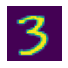

In [27]:
show_image(three_tensors[1])

In [ ]:
three_tensors[1]

In [29]:
stacked_sevens = torch.stack(seven_tensors).float()/255

In [30]:
stacked_threes = torch.stack(three_tensors).float()/255

In [31]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
stacked_threes

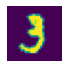

In [42]:
show_image(stacked_threes[0])

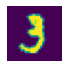

In [41]:
show_image(stacked_threes[0,:,:])

In [43]:
len(stacked_threes.shape)

3

In [44]:
stacked_sevens.ndim

3

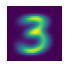

In [46]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [49]:
df = pd.DataFrame(mean3)
df.style.set_properties(**{'font-size':'1pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,0.000196,0.000234,0.000193,0.000276,0.000262,0.000294,0.000284,0.000157,0.000049,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000016,0.000487,0.000773,0.001447,0.002979,0.005649,0.009518,0.015693,0.021113,0.024280,0.025964,0.024268,0.020875,0.017108,0.011642,0.007044,0.003994,0.001495,0.000329,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000024,0.000033,0.000156,0.001400,0.005785,0.013664,0.030111,0.055401,0.090316,0.137247,0.183566,0.221279,0.246549,0.249719,0.235358,0.198716,0.150844,0.105427,0.064754,0.032829,0.013352,0.004597,0.000393,0.000002,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000058,0.001520,0.008891,0.027837,0.061064,0.112706,0.186884,0.280245,0.382971,0.480244,0.558773,0.613238,0.623291,0.597713,0.528347,0.421000,0.305756,0.203470,0.117423,0.053793,0.016992,0.003462,0.000259,0.000000,0.000000,0.000000
6,0.000000,0.000007,0.000301,0.005817,0.024498,0.059899,0.120376,0.207547,0.319394,0.435468,0.544466,0.627637,0.685036,0.723949,0.744886,0.744625,0.705004,0.608746,0.479163,0.339491,0.213218,0.108683,0.037335,0.007908,0.000823,0.000000,0.000000,0.000000
7,0.000000,0.000324,0.000454,0.009741,0.037895,0.082921,0.153822,0.241572,0.337670,0.426816,0.491613,0.528414,0.544748,0.558829,0.586409,0.627503,0.651254,0.621123,0.528493,0.407527,0.270252,0.144119,0.053465,0.011405,0.001049,0.000000,0.000000,0.000000
8,0.000000,0.000126,0.000540,0.011943,0.040899,0.078775,0.134423,0.194570,0.250744,0.294886,0.316929,0.317466,0.311332,0.321823,0.366340,0.452056,0.537596,0.570680,0.526004,0.417367,0.277697,0.147914,0.056850,0.011186,0.000565,0.000000,0.000000,0.000000
9,0.000000,0.000135,0.000646,0.009146,0.029371,0.054969,0.089482,0.119549,0.141732,0.155846,0.161737,0.161483,0.169577,0.205845,0.292121,0.418709,0.530466,0.574460,0.516988,0.388448,0.243504,0.119844,0.044328,0.008707,0.000116,0.000040,0.000000,0.000000


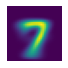

In [50]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

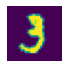

In [51]:
a_3 = stacked_threes[0] # 일부러 책과 다른 0번 숫자로 진행
show_image(a_3)

In [52]:
dist_3_abs = (a_3 - mean3).abs().mean()

In [53]:
dist_3_abs

tensor(0.1074)

In [54]:
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

In [55]:
dist_3_sqr

tensor(0.1912)

In [56]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1441), tensor(0.2780))

In [58]:
if dist_3_sqr < dist_7_sqr : 
  print('3')
else : 
  print('7')

3


In [61]:
F.l1_loss(a_3, mean7), F.mse_loss(a_3, mean7).sqrt() # .float()를 안써봄

(tensor(0.1441), tensor(0.2780))

In [62]:
# 넘파이!

In [63]:
data = [[1,2,3],[4,5,6]]
arr = array(data) # 넘파이 어레이
tns = tensor(data) # 파이토치 텐서

In [64]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [66]:
tns[1] # 2차원 데이터일 경우 1행을 선택 / 1차원 데이터인 경우? 1번 값을 선택

tensor([4, 5, 6])

In [67]:
tns[:, 1] # 2차원 데이터일 경우 전체 행과 그에 대한 1열을 선택

tensor([2, 5])

In [68]:
tns[1, 1:3] # 1행의 1:3 열(3열 전까지, 즉 1~2열)

tensor([5, 6])

In [69]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [70]:
tns.type()

'torch.LongTensor'

In [71]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [72]:
(tns*1.5).type()

'torch.FloatTensor'

In [73]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])

In [74]:
valid_3_tens = valid_3_tens / 255
valid_7_tens = valid_7_tens / 255

In [75]:
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [107]:
def mnist_distance(a, b) : 
  return (a-b).abs().mean(axis=(0,1)) # 0, 1이라고 해도 될 것 같았음

In [108]:
mnist_distance(a_3, mean3) # 거리는 잘 나옴

tensor(0.1074)

In [109]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.0000e+00, 1.0270e-04, 3.4052e-03, 1.8607e-02, 4.4017e-02, 7.3867e-02, 1.0617e-01, 1.4076e-01, 1.7593e-01, 2.0704e-01, 2.2726e-01, 2.3498e-01, 2.3601e-01, 2.3658e-01, 2.4428e-01, 2.5518e-01,
         2.6811e-01, 2.7694e-01, 2.7036e-01, 2.4480e-01, 1.8714e-01, 1.1410e-01, 5.0484e-02, 1.2651e-02, 1.0908e-03, 1.9806e-05, 1.0074e-05, 0.0000e+00]),
 torch.Size([28]))

In [110]:
def mnist_distance(a, b) : 
  return (a-b).abs().mean(axis=(-1,-2)) # 0, 1이라고 하면 왜 밑에서 다른 결과가 나올까?(텐서 shape이 [28]이 나옴)
                                        # 아하, 2차원 데이터면 뒤에 두 개가 0, 1인데 3차원일 경우엔 1,2가 되니까!!!

In [111]:
mnist_distance(a_3, mean3)

tensor(0.1074)

In [112]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1193, 0.1223, 0.1197,  ..., 0.1388, 0.1277, 0.1316]),
 torch.Size([1010]))